Machine Learning Classifier:
Model Accuracy: 0.731257208766
Cross Val Score: 0.740483569623




None


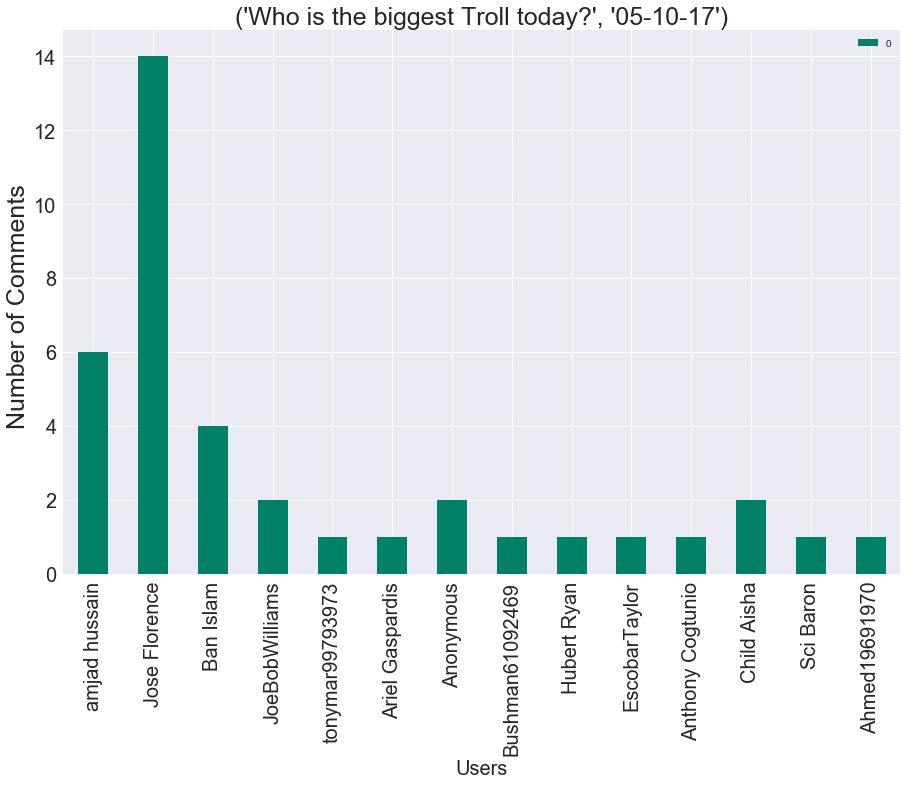

In [5]:
import collections
import numpy as np
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
%matplotlib inline 

#Take note of the date for this trolls
date = datetime.date.today().strftime("%m-%d-%y")

path = '/Users/al_jazeera/Desktop/trolls'

def load_it(files):
    list_of_col = []
    list_of_content = []
    test_content = []
    for filename in os.listdir(files):
            each_file = "/Users/al_jazeera/Desktop/trolls/" + str(filename)        
            each_file = open(each_file)
            read_file = each_file.read()

            content = json.loads(read_file).values()
            list_of_content.append(content)

            titles = json.loads(read_file).keys()
            col_features = (cols_of_matrix(comments_turned_to_words(content), headlines(titles), identify_users(content)))

            list_of_col.append(col_features)

load_it(path)

def identify_users(block):
    
    """Splits the data to identify users from a dictionary
    INPUT: Takes a json block of text and parses through it
    OUTPUT: The total list of users from a particular block"""
    
    users = []
    individual_word = []
    for item in block:
        users.append(list(item))
    user_name = (sum(users, []))
    user_name=(sorted(set(user_name)))
    for name in user_name:
        individual_word.append(name.split())
    
    return (sum(individual_word,[]))


def headlines(block):
    
    """Takes the headlines for each article and makes a separate list for them
    INPUT: Block of Text for json file
    OUTPUT: Unique words split and put in a list"""
    
    text = []
    headline_words = []
    for item in block:
        text.append(item.replace("|","").replace(":","").replace("'","").replace(",",""))
    for word in text:
        headline_words.append(word.split())
    
    return sorted(set(sum(headline_words,[])))


def comments_turned_to_words(block):
    
    """Takes users comments and splits them into individual words
    INPUT: A block of text from a json file 
    OUTPUT: The set of individual words used by a users, cleaned and added to a list"""
    
    words = []
    for item in block:
        for i in item:
            words.append(list(item[i]))
    words = sum(words,[])
    remove = [";","&","#39","&160","'"]
    clean_words = []
    for i in range(len(words)):
        clean_words.append(words[i].replace(";","").replace("!","! ").replace("?"," ? ").replace("$","$ ").replace("%"," %").replace(",","").replace(":","").replace("&","").replace("#160","").replace("“","").replace("."," . ").replace("(","").replace(")","").replace("-","").replace("#39","").split())
    
    return sorted(set(sum(clean_words,[])))


def cols_of_matrix(users, titles, words):
    
    """Combines all the users comments, titles, and words, and looks for a unique set
    INPUT: Takes in the users name, the title for the article they commented on, and the words
    OUTPUT: A lot of unique words from the user comments, titles, and words"""
    
    return sorted(set(users + titles + words))

def combine_the_columns(col_list):
    
    """Combines all these comments and then takes the set again"""
    
    col_list = sum(col_list,[])
    return sorted(set(col_list))


def make_feature_matrix(block, features):
    
    """Builds my feature matrix for scratch by using every unique word found to be a column, and 
    the users choice of words to be a frequency.
    INPUT: A block of text from the JSON file stored on S3
    OUTPUT: A list of arrays that represent the word frequencies found in each users comments"""
    
    feat = np.asanyarray(features).T
    row, = feat.shape
    empty_user_row = np.ones(shape=(1,row))
    dictionaire = {}
    user_matrix = []
    
    for item in block:
        for i in item:
            user_str = (i + " " + (item[i][0]).replace(";","").replace("!","! ")
            user_str = user_str.split()
            for j in range(len(user_str)):
                if j != len(user_str):
                        if user_str[j] in dictionaire.keys():
                            dictionaire[user_str[j]] += 1
                        else:
                            pass
                else:                    
                    for p in range(len(list(dictionaire.keys()))):
                        specific_index = features.index(list(dictionaire.keys())
                        empty_user_row[specific_index] = (list(dictionaire.values())[p])
                    user_matrix.append(empty_user_row)
                    empty_user_row = np.ones(shape=(2,row))
                    dictionaire = {}
             
    return user_matrix

def reshape(matrix):
    fm = []
    for item in list_of_content:
        fm.append(make_feature_matrix(item,combine_the_columns(list_of_col)))
    fm = sum(fm,[])

    fm2 = []
    for item in test_content:
        fm2.append(make_feature_matrix(item,combine_the_columns(list_of_col)))

    row, col = fm2[0][0].shape

    fm2 = np.reshape(fm2,(-1,col))

    return fm2

    
#LABELED AL-JAZEERA COMMENTS 
y1 = [0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0]
y1 = np.asarray(y1)
y2 = [1,0,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,1,1]
y2 = np.asarray(y2)
y3 = [1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,1,1]
y3 = np.asarray(y3)
y4 = [0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0]
y4 = np.asarray(y4)
y5 = [0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0]
y5 = np.asarray(y5)
y6 = [1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0]
y6 = np.asarray(y6)
y7 = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1]
y7 = np.asarray(y7)
y8 = [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0]
y8 = np.asarray(y8)
y9 = [0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0]
y9 = np.asarray(y9)
y10 = [0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0]
y10 = np.asarray(y10)
y11 = [0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,1,0,0]
y11 = np.asarray(y11)
y12 = [0,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0]
y12 = np.asarray(y12)
y13 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1]
y13 = np.asarray(y13)
y14 = [0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,1]
y14 = np.asarray(y14)
y15 = [1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0]
y15 = np.asarray(y15)
y16 = [0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0]
y16 = np.asarray(y16)
y17 = [1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1]
y17 = np.asarray(y17)
y18 = [0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,1,1]
y18 = np.asarray(y18)
y19 = [0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0]
y19 = np.asarray(y19)
y20 = [1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0]
y20 = np.asarray(y20)
y21 = [1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0]
y21 = np.asarray(y21)

#CONCATENATES INTO X MATRIX
X = np.concatenate(fm, axis=0)

#CONCATENATES Y's INTO Y MATRIX
y = np.asanyarray(np.concatenate((y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21),axis=0))

#Section on Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 


#Section on Machine Learning
def machine_learn(X, y):
    
    """Uses a boosted Naieve Bayes model to predict the trolls from the imput data
    INPUT: X_train, y_train
    OUTPUT: A list of identified trolls"""
    
    adan2 = MultinomialNB(n_estimators=100).fit(X_train, y_train)

    test_score2 = adan2.score(X_test, y_test)
    print ("Machine Learning Classifier:")
    print ("Model Accuracy:", test_score2)
    scores2 = cross_val_score(adan2, X_train, y_train)
    print ("Cross Val Score:", scores2.mean())
    ada_troll_index = (np.argwhere(adan2.predict(fm2))+1)
    
    return ada_troll_index

ada_troll_index = machine_learn(X_train,y_train)


def troll_catcher(content, troll_index):
    
    """Creates a list of all the trolls from a given comment block
    Input: Takes a block of new text and the index score from a troll_classifier 
    Output: Returns a list of troll usernames"""
    
    person_count = 0
    comment_count = 0
    troll_catcher = []
    for item in content:
        for i in item:
            person_count +=1
            comment_count += 1
            if person_count in troll_index:
                troll_catcher.append(i)
            else:
                pass 
    return troll_catcher

html_comment = pd.DataFrame(troll_catcher(test_content[0],ada_troll_index)).to_html()


def troll_count(list_of_trolls):
    
    """Prints the number of trolls on a given day
    INPUT: Takes a list of trolls
    OUTPUT: A scalar value for the number of trolls predicted """
    
    return "There were {} troll comment on Al-Jazeera.".format(len(list_of_trolls))


(troll_count(troll_catcher(test_content[0], ada_troll_index)))


def plot_dem_fools(list_of_trolls, date):
    """Plots the names of the trolls and the number of comments they made on a particular day
    INPUT: Takes a list of trolls from the troll_catcher and the current date
    OUTPUT: Prints a graph of the t"""
    question = "Who is the biggest Troll today?", date 
    cnt = Counter()
    
    for person in list_of_trolls:
        cnt[person] += 1
        
    df = pd.DataFrame.from_dict(cnt, orient='index')
    df.plot(kind='bar',
            figsize=(15,10), 
            stacked=False, 
            fontsize=20, 
            legend = True, 
            colormap="summer")
    
    plt.title(question,fontsize = 25)
    plt.ylabel("Number of Comments ", fontsize = 25)
    plt.xlabel("Users", fontsize = 20)
    
print (plot_dem_fools(troll_catcher(test_content[0], ada_troll_index),date))


def trolls_and_their_comments(content, troll_index):
    
    """Used to visually see the users and their comments.  
    Input: Takes a block of new text and the index score from a troll_classifier 
    Output: Returns trolls usernames and their respective comments."""
    troll_dics = {}
    person_count = 0
    comment_count = 0
    for item in content:
        for i in item:
            person_count +=1
            comment_count += 1
            if person_count in troll_index:
                troll_dics[i] = [item[i][0]]
            else:
                pass                  
    
    return troll_dics

pd.set_option('display.max_colwidth', -1)
df = pd.DataFrame(trolls_and_their_comments(test_content[0], ada_troll_index))
df = df.transpose()

In [3]:
pd.set_option('display.max_colwidth', -1)
df = pd.DataFrame(trolls_and_their_comments(test_content[0], ada_troll_index))
df = df.transpose()
df.columns = ["User Comments"]
df

,User Comments
Ahmed19691970,You are so simple my friend. You don&#39;t know ground reality. Ask your military.
Anonymous,WHAT WILL 3000 EXTRA OR 10000 TROOPS DO NOTHING THE TALIBAN HAVE NOTHING TOO DISCUSS WITH THE AMERICANS AND THERE PUPPETS IN KABUL . THEY ALL NEED TO GO AWAY AND ADMIT DEFEAT BEFORE THE DEFEAT IS IMPOSED ON THE INVADER EVIL &#160;MUSLIM KILLERS .
Anthony Cogtunio,"Hey Max, it hurts looking like an idiot not knowing the real motives behind the scenes while you watch propaganda news and gobble their diarrhea. Then you try to regurgitate it and pass it off as reality. Just sit back and let people who know what&#39;s going on discuss these topics. You can take notes."
Ariel Gaspardis,"Nobody is agreeing to anything, you idiot. &#160;I am just not a &#160;brain dead partisan that automaticaklly knows the answer to everything based on fixed biases.&#160;"
Ban Islam,"Do you know why Muslims are so violent (Jihad)? Why do they do such unsanitary and unhealthy practices (FGM)? Why do they implement views that are detrimental to society (Sharia Law)? From multiple reports, the answer is both shocking and disgusting: massive inbreeding.&#160;According to European news reports, &#160;consequences of intermarriage between first cousins have reportedly been linked to serious impacts on their children’s intelligence, sanity, and health.&#160;Some prime examples of how dangerous it is to procreate with family members includes said traditional procreation practices among ancient Egyptians and European royal families. Pharaohs would often marry their sisters or half-sisters.&#160;Generations later, those within their family would be unfit to rule because of physical disabilities. As for European monarchs, they would intermarry family members to keep their blood “pure royal.” After years of such intermarriage, the amount of mental retardation and handicaps were tantamount.&#160;Muslims have been intermarrying for the last 1,400 years and still do so today. Therefore, they have surpassed any length of serial intermarriage within families throughout history. Their practice even predates the oldest monarchy, the Danish, by 300 years.&#160;With that in mind, what are the statistics for Muslim inbreeding? The estimate back in 2009 was half of all Muslims in the world are inbred.&#160;In Pakistan, 70 percent of marriages are between first cousins. In Turkey, the amount is between 20 to 30 percent. As for other Muslim countries, Algiers is 34 percent, Bahrain is 46 percent, Egypt is 33 percent, Nubia is 80 percent, Iraq is 60 percent, Jordan is 64 percent, Kuwait is 47 percent, Lebanon is 42 percent, Libya is 48 percent, Mauritania is 47 percent, Qatar is 54 percent, Saudi Arabia is 67 percent, Sudan is 63 percent, Syria is 40 percent, Tunisia is 39 percent, United Arabic Emirates is 54 percent, and Yemen is 45 percent.&#160;This is truly bad for Muslims, especially with numerous studies proving the consequential results of intermarried couples breeding. First, is low intelligence in which children conceived of incestuous relationships have an intelligence quotient (IQ) that is 10 to 16 points lower along with slower development in social behavior. Second, is mental and physical diseases. Mental diseases include far more intense depression, schizophrenia, and (surprise, surprise) insanity. Physical diseases include autosomal recessive disorders like cystic fibrosis and spinal muscular atrophy.&#160;In conclusion, Muslims may act how they act, believe in what they believe, and do what they do because of years of inbreeding.ED"
Bushman61092469,They&#39;re sellouts that&#39;s way you like them while isis stopped Christian homosexual infestation in the Muslim world.&#160;
Child Aisha,"A Mohammedian is a wife beater, a daughter &#160;honor killer, killer of blasphemer, &#160;stones to death adulteress, preaches hatred for infidel, &#160;takes infidel women as scx slaves.....What do u expect from such a violent group."
EscobarTaylor,"Yeah

In [4]:
output = df.to_html()
with open('output1.txt', 'w') as f:
    f.write(output)

In [30]:
str(datetime.datetime.now().time())

'19:28:55.069472'

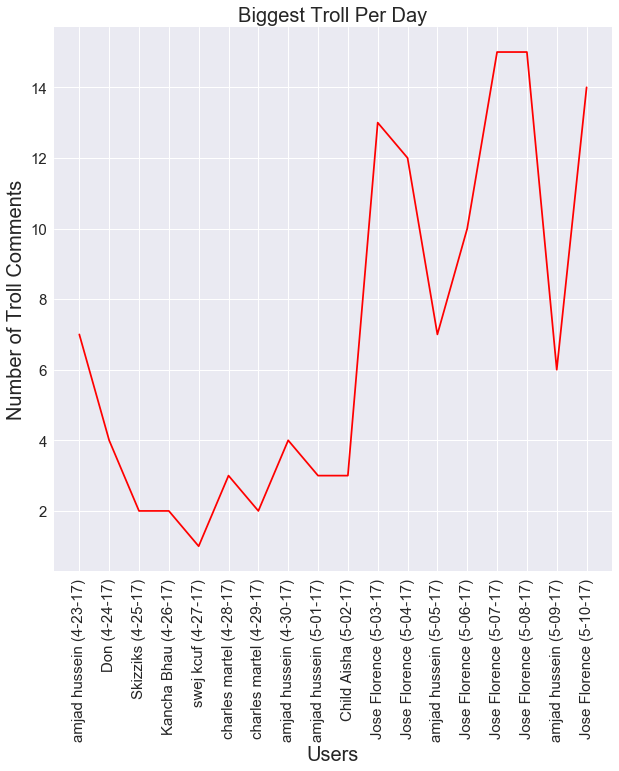

In [6]:
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 


def over_time(X_train,y_train,days):
    for day in days:
        day_result = machine_learn(X_train,y_train)
        total.append(day_results)
    return total

over_time(X_train, y_train, 14)

p = ["amjad hussein (4-23-17)",
     "Don (4-24-17)", 
     "Skizziks (4-25-17)", 
     "Kancha Bhau (4-26-17)",
     "swej kcuf (4-27-17)",
     "charles martel (4-28-17)",
     "charles martel (4-29-17)",
     "amjad hussein (4-30-17)",
     "amjad hussein (5-01-17)",
     "Child Aisha (5-02-17)",
     "Jose Florence (5-03-17)",
     "Jose Florence (5-04-17)",
     "amjad hussein (5-05-17)",
     "Jose Florence (5-06-17)", 
     "Jose Florence (5-07-17)",
     "Jose Florence (5-08-17)",
     "amjad hussein (5-09-17)",
     "Jose Florence (5-10-17)"]

plt.figure(figsize=(10,10))
x = range(18)
pylab.xticks(x, p, rotation= 90, fontsize=15, )
# ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)
pylab.plot(x,c,"r")
plt.tick_params(axis='y', labelsize=15)
plt.title("Biggest Troll Per Day", fontsize=20)
plt.xlabel('Users', fontsize= 20)
plt.ylabel("Number of Troll Comments", fontsize=20)